# Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.

Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

1. You might find this easier to accomplish in two distinct sets of data wrangling steps.
2. Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
3. By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function. This is optional.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Load the dataset
billboard = pd.read_csv('billboard.csv')
selected_columns = ['performer', 'song', 'year', 'week', 'week_position']
billboard = billboard[selected_columns]
billboard.head(5)

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8


## Part A 
Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [4]:
billboard

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8
...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22
327893,Al Green,Here I Am Come & Take Me,1973,39,22


In [5]:
# Group by song and performer, and calculate the total weeks on chart
popular_songs = billboard.groupby(['song', 'performer'])[['week']].count()
popular_songs.rename(columns={'week': 'count'}, inplace=True)
popular_songs = popular_songs.reset_index()
popular_songs

# Sort by total weeks on chart in descending order
top_10_songs = popular_songs.sort_values(by='count', ascending=False).head(10)
top_10_songs = top_10_songs.reset_index(drop=True)
top_10_songs

,song,performer,count
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,I'm Yours,Jason Mraz,76
3,Blinding Lights,The Weeknd,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Foolish Games/You Were Meant For Me,Jewel,65
8,Rolling In The Deep,Adele,65
9,Before He Cheats,Carrie Underwood,64


The table displays the top 10 most popular songs since 1958, based on the total number of weeks each song appeared on the Billboard Top 100 chart.

## Part B 
Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

In [6]:
# Filter the data to exclude 1958 and 2021
filtered_billboard = billboard[(
    billboard['year'] != 1958) & (billboard['year'] != 2021)]
filtered_billboard

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8
...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22
327893,Al Green,Here I Am Come & Take Me,1973,39,22


In [7]:
# Group by year and count unique songs in each year
musical_diversity = filtered_billboard.groupby(
    'year')[['song']].nunique().reset_index()

musical_diversity.rename(columns={'song': 'unique_songs'}, inplace=True)
musical_diversity

,year,unique_songs
0,1959,641
1,1960,668
2,1961,747
3,1962,748
4,1963,739
...,...,...
57,2016,520
58,2017,555
59,2018,694
60,2019,621


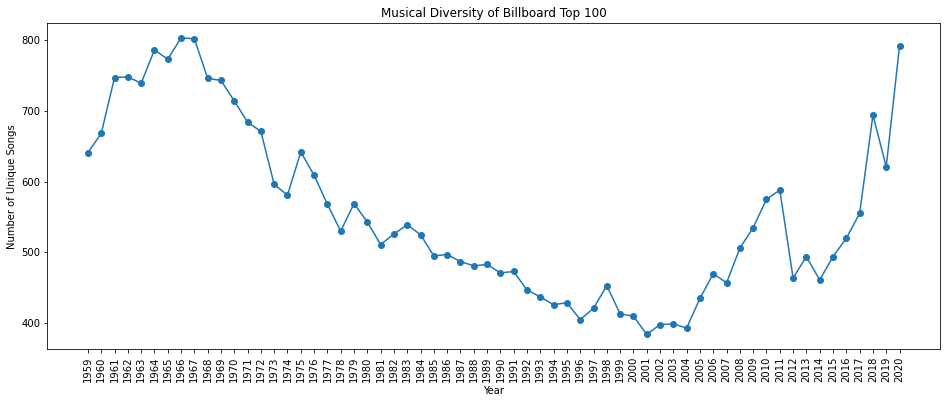

In [8]:
# Plot a line graph to visualize musical diversity over the years
plt.figure(figsize=(16, 6))
plt.plot(musical_diversity['year'],
         musical_diversity['unique_songs'], marker="o")
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity of Billboard Top 100')
plt.xticks(musical_diversity['year'], rotation=90)
plt.show()

## Part C 
Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

In [9]:
# Filter the data to include only "ten-week hits"
ten_week_hit = billboard.groupby(['performer', 'song'])[['week']].count()
ten_week_hit.rename(columns={'week': 'count'}, inplace=True)
ten_week_hit = ten_week_hit.reset_index()
ten_week_hit = ten_week_hit[ten_week_hit['count'] >= 10]
ten_week_hit

,performer,song,count
0,"""Groove"" Holmes",Misty,11
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10
4,"""Weird Al"" Yankovic",Amish Paradise,16
6,"""Weird Al"" Yankovic",Eat It,12
12,"""Weird Al"" Yankovic",Smells Like Nirvana,11
...,...,...,...
29377,twenty one pilots,Ride,39
29379,twenty one pilots,Stressed Out,52
29383,will.i.am & Britney Spears,Scream & Shout,24
29384,will.i.am & Nicki Minaj,Check It Out,15


In [10]:
# Group by performers and count the number of ten-week hits for each performer
performer_ten_week_hit = ten_week_hit.groupby(
    'performer')[['song']].count().reset_index()

performer_ten_week_hit.rename(
    columns={'song': 'num_ten_week_hit'}, inplace=True)

performer_ten_week_hit

,performer,num_ten_week_hit
0,"""Groove"" Holmes",1
1,"""Little"" Jimmy Dickens",1
2,"""Weird Al"" Yankovic",4
3,'N Sync,8
4,'N Sync & Gloria Estefan,1
...,...,...
6121,t.A.T.u.,1
6122,twenty one pilots,4
6123,will.i.am & Britney Spears,1
6124,will.i.am & Nicki Minaj,1


In [11]:
# Filter performers with at least 30 ten-week hit
performer_30_hits = performer_ten_week_hit[performer_ten_week_hit["num_ten_week_hit"] >= 30]
performer_30_hits

,performer,num_ten_week_hit
507,Billy Joel,32
675,Brad Paisley,30
946,Chicago,31
1256,Daryl Hall John Oates,30
1514,Drake,31
1633,Elton John,52
1996,George Strait,30
2391,Jason Aldean,30
2833,Keith Urban,36
2856,Kenny Chesney,42


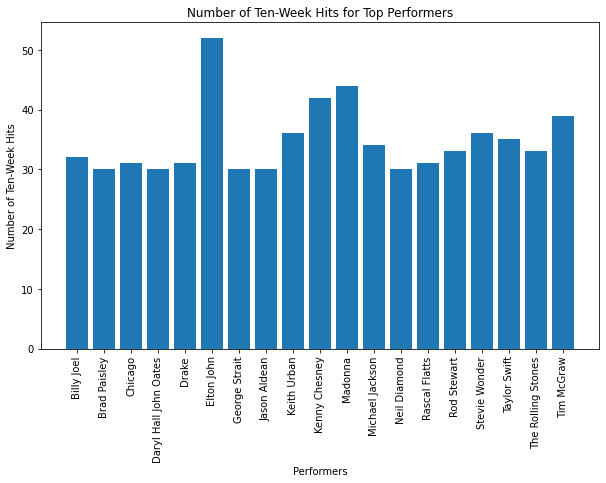

In [12]:
# Create a bar plot to visualize the number of ten-week hit

plt.figure(figsize=(10, 6))
plt.bar(performer_30_hits['performer'], performer_30_hits['num_ten_week_hit'])
plt.xlabel("Performers")
plt.ylabel("Number of Ten-Week Hits")
plt.title("Number of Ten-Week Hits for Top Performers")
plt.xticks(rotation=90)
plt.show()